## digits recognition

### Train/Test Split + Fit/Predict/Accuracy

#### ____에 적절한 코드를 입력한 후 실행하세요.

In [1]:
# Import necessary modules
from sklearn.datasets import load_digits 
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline

# Preprocessing
from sklearn.model_selection import train_test_split

# Modeling
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Load the digits dataset: digits

digits = load_digits()

In [3]:
# Create feature and target arrays
X = digits.data
y = digits.target

In [4]:
# Split X into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=123) 
#학습과 평가데이터를 랜덤하게 쪼개는게 randomstate
#그 randomstate를 하나로 고정하면 계속 같은 값이 나오게 됨( 안하면 할때마다 다른 값나옴 )

In [5]:
# Create a k-NN classifier with 7 neighbors: knn

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

In [6]:
# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [7]:
# Print the accuracy
accuracy = knn.score(X_test,y_test)
print("Accuracy of KNN:", accuracy) #test데이터로 정확도 평가(train은 평가X)
#k가 적을수록 과적합이 발생함, k값의 변화에 따라서 적합의 변화가 일어남

Accuracy of KNN: 0.9763560500695411


In [8]:
knn.predict(X_test)#예측값

array([3, 3, 4, 4, 1, 3, 1, 0, 7, 4, 0, 0, 5, 1, 6, 0, 3, 1, 0, 6, 9, 7,
       7, 5, 4, 5, 7, 0, 0, 9, 1, 6, 8, 6, 1, 4, 6, 2, 1, 6, 0, 6, 2, 0,
       2, 3, 9, 8, 8, 1, 2, 8, 6, 5, 1, 6, 4, 6, 0, 4, 3, 5, 6, 2, 8, 8,
       8, 2, 0, 1, 7, 9, 4, 7, 3, 9, 4, 3, 3, 8, 3, 5, 4, 6, 1, 2, 4, 2,
       4, 5, 8, 4, 1, 7, 6, 7, 5, 5, 6, 3, 9, 4, 6, 6, 8, 1, 7, 5, 6, 4,
       9, 8, 7, 0, 9, 0, 2, 9, 0, 5, 1, 4, 4, 2, 2, 0, 7, 3, 6, 8, 2, 5,
       2, 3, 3, 9, 6, 7, 4, 0, 7, 3, 2, 2, 2, 3, 8, 1, 7, 1, 5, 7, 9, 1,
       3, 2, 6, 0, 7, 9, 6, 0, 2, 6, 3, 1, 5, 5, 9, 6, 1, 8, 6, 1, 3, 4,
       4, 2, 0, 5, 9, 0, 7, 0, 7, 5, 8, 4, 8, 8, 3, 7, 9, 8, 2, 0, 3, 4,
       9, 4, 1, 8, 7, 0, 5, 4, 5, 2, 2, 1, 4, 2, 0, 8, 7, 3, 2, 9, 2, 3,
       8, 0, 6, 0, 2, 8, 7, 5, 4, 8, 0, 1, 5, 5, 0, 9, 8, 7, 7, 1, 4, 2,
       4, 7, 1, 3, 0, 8, 2, 8, 6, 6, 3, 5, 6, 4, 5, 4, 6, 5, 7, 7, 9, 9,
       1, 0, 4, 6, 1, 7, 3, 9, 8, 1, 0, 4, 5, 6, 8, 2, 5, 8, 4, 0, 8, 3,
       1, 6, 6, 4, 6, 1, 4, 6, 6, 4, 1, 5, 3, 0, 1,

In [9]:
knn.predict_proba(X_test)#0에서 9까지의 총 10개의 예측값 중에서 가장 높은걸 추출한 것이 predict 

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.14285714],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.14285714,
        0.        ]])

### Overfitting and underfitting
k 값에 따라 학습 및 평가 데이터의 정확도가 어떻게 달라지는지 관찰함으로써 overfitting과 underfitting에 직관을 갖을 수 있게 됩니다.

In [10]:
# 이 셀의 코드는 수정하지 마세요 !
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#### ____에 적절한 코드를 입력한 후 실행하세요.

In [11]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train) #train데이터의 정확성을 확인 

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test) #test데이터의 정확성을 확인 

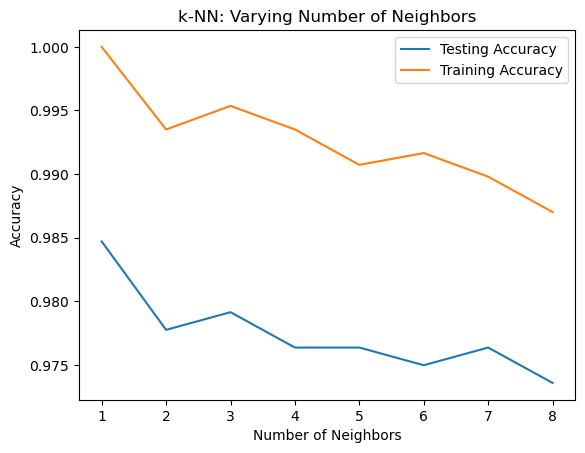

In [12]:
# 이 셀의 코드는 수정하지 마세요 !
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#평가데이터와 학습 데이터의 차이 가 과대적합. 그래프를 보고 과적합이 있는지 확인가능함. 
#test_size 의 비중이 10%일때와 40%일때(0.1,0.4일때)의 차이, 왜 더 큰 과대적합이 발생했느냐? 
#학습 데이터가 바뀜에 따라서 학습할수 잇는 데이터가 적어지면 성능이 완전하게 달라지게됨. 
#(학습하는 데이터 자체의 양이 작기 때문_그러면 비율에따라 과적합이 훨신 많아지게 됨)

1. import 모델
2. 모델 명 호출(객체 생성): knn(parameter)
    hyper parameter(모델의 성능 조절)
    random state (난수 고정) ,knn은 파라미터 값에 따라서 달라짐
3. 모델 학습: 이름 *knn.fit(x_train,y_train)    